# 13주차(화) 실습문제 - 로지스틱 회귀모델 (Ch.6.3)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
data20 = data[data.age <= 20]  # 만 19~24세 남녀 데이터

## 1. 신체 정보로 남/여 성별 예측하기
### 1-1. data20에 male 열을 추가하고 남성은 1, 여성은 0의 값을 저장하라. 이후 height, weight, waist, BMI 값 각각으로 남성인지 여부(male)를 예측하는 로지스틱 회귀곡선 그래프를 그려보라.
어느 변수가 남성과 여성을 구분(분류)하는데 가장 유용한가?
남성과 여성 차이를 구분하기 가장 힘든 변수는 무엇인가?

In [8]:
data20['male'] = [1 if b == 'M' else 0 for b in data20['sex']]
data20

<ipython-input-8-26fdf81f60a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['male'] = [1 if b == 'M' else 0 for b in data20['sex']]


,ID,sex,age,height,weight,waist,BMI,Blood_glucose,male
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91,0
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95,1
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84,0
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89,0
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89,1
...,...,...,...,...,...,...,...,...,...
5511,O905024003,F,19,164.9,52.9,67.2,19.454244,88,0
5550,O906025503,M,19,173.4,78.4,83.7,26.074613,97,1
5627,O908030303,M,20,177.0,88.5,89.8,28.248588,87,1
5652,O909028301,M,20,180.4,81.3,79.2,24.981441,92,1


C:\Users\user\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\user\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


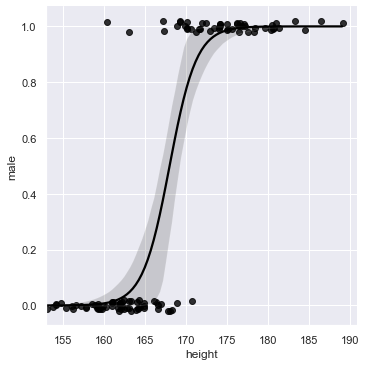

In [9]:
sns.lmplot(x = "height", y = "male",
           data = data20, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

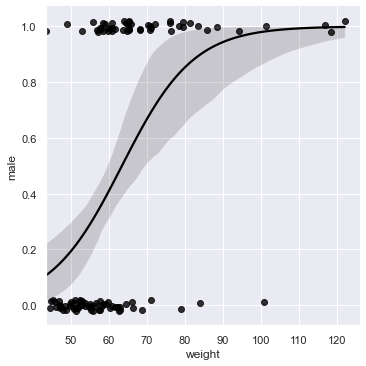

In [10]:
sns.lmplot(x = "weight", y = "male",
           data = data20, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

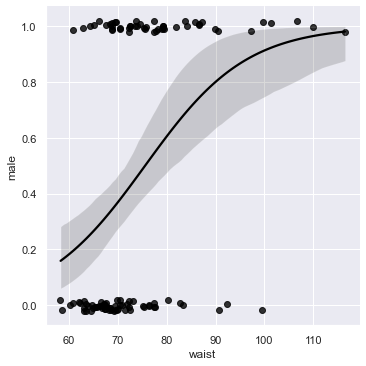

In [11]:
sns.lmplot(x = "waist", y = "male",
           data = data20, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

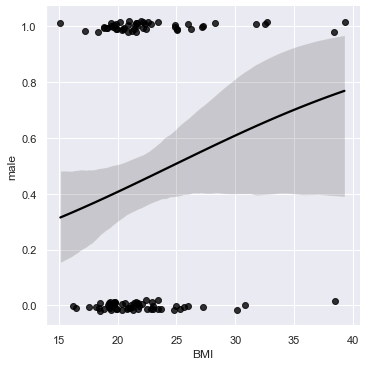

In [12]:
sns.lmplot(x = "BMI", y = "male",
           data = data20, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

In [ ]:
# height가 가장 유용, BMI가 가장 구분하기 힘들다

### 1-2. height 값을 이용해 남성 여부(male)를 예측하는 로지스틱 회귀 모델을 만들고, null model과 비교하라. 
height 변수는 통계적으로 유의미한 계수 값을 갖는가? 

로그 우도(Log-Likelihood)와 Deviance 값은 각각 어떠한가?

In [15]:
mod_glm_null = smf.glm(
    "male ~ 1", data = data20, 
    family=sm.families.Binomial()).fit()

In [16]:
mod_glm_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   male   No. Observations:                  111
Model:                            GLM   Df Residuals:                      110
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.393
Date:                Tue, 25 May 2021   Deviance:                       152.79
Time:                        17:45:19   Pearson chi2:                     111.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1989      0.191     -1.042      0.297      -0.573       0.175
==============================================================================
"""

In [13]:
mod_glm = smf.glm(formula = "male ~ height", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

In [14]:
mod_glm.summary()
# null모델에 비해 로그우도 값이 더 커졌고 deviance값이 더 작아졌다
# p<0.05 이므로 통계적으로 유의미하다

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   male   No. Observations:                  111
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.090
Date:                Tue, 25 May 2021   Deviance:                       42.181
Time:                        17:44:43   Pearson chi2:                     146.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -102.8850     21.504     -4.784      0.000    -145.032     -60.738
height         0.6123      0.128      4.776      0.000       0.361       0.864
==============================================================================
"""

### 1-3. height, weight, waist, BMI 값을 이용한 예측 모델을 각각 만들고(각각 하나의 독립변수로 예측), 더 성능이 좋은 순으로 나열해보라. 

In [17]:
mod_glm_h = smf.glm(formula = "male ~ height", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

In [18]:
mod_glm_we = smf.glm(formula = "male ~ weight", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

In [19]:
mod_glm_wa = smf.glm(formula = "male ~ waist", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

In [20]:
mod_glm_B = smf.glm(formula = "male ~ BMI", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

In [27]:
print("height 모델　：",mod_glm_h.aic)
print("weight 모델：", mod_glm_we.aic)
print("waist 모델：", mod_glm_wa.aic)
print("BMI 모델：", mod_glm_B.aic)
# aic 값이 작은 순서인 height, weight, waist, BMI순으로 성능이 좋다

height 모델　： 46.18050855992794
weight 모델： 125.32756107611533
waist 모델： 136.86281313723188
BMI 모델： 153.65266829353658


### 1-4. height값에 기반한 모델로 data20의 각 샘플(행)에 대해 남성인지 확률을 추정하시오. 또한 확률 p >= 0.5 이상이면 남성, p < 0.5 면 여성으로 분류해서 predicted_sex 열에 저장하고, 예측이 틀린 샘플을 찾아 출력하시오.
height 값에 기반한 로지스틱 회귀모델이 예측에 실패한 경우는 몇 명인가?

In [50]:
exp_val = data20['height']
pred = mod_glm_h.predict(exp_val)
pred

163     0.246691
182     0.376598
197     0.078460
256     0.001322
257     0.986240
          ...   
5511    0.128715
5550    0.964168
5627    0.995917
5652    0.999489
5801    0.997169
Length: 111, dtype: float64

In [55]:
data20['predicted_sex'] = [1 if b >= 0.5 else 0 for b in mod_glm_h.predict()]
data20

<ipython-input-55-7c2be3be682c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['predicted_sex'] = [1 if b >= 0.5 else 0 for b in mod_glm_h.predict()]


,ID,sex,age,height,weight,waist,BMI,Blood_glucose,male,predicted_sex
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91,0,0
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95,1,0
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84,0,0
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89,0,0
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89,1,1
...,...,...,...,...,...,...,...,...,...,...
5511,O905024003,F,19,164.9,52.9,67.2,19.454244,88,0,0
5550,O906025503,M,19,173.4,78.4,83.7,26.074613,97,1,1
5627,O908030303,M,20,177.0,88.5,89.8,28.248588,87,1,1
5652,O909028301,M,20,180.4,81.3,79.2,24.981441,92,1,1


In [59]:
data20[data20.predicted_sex != data20.male]

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,male,predicted_sex
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95,1,0
1792,C909024703,M,20,163.2,58.9,68.8,22.114391,84,1,0
2731,H902024603,M,19,167.3,60.7,77.9,21.686867,82,1,0
2809,H904022504,F,20,168.3,55.3,67.6,19.523465,88,0,1
2978,H908029504,F,20,169.0,62.3,69.2,21.812962,80,0,1
3305,H918029203,F,20,170.7,56.5,68.3,19.390161,84,0,1
3393,H921032101,F,20,168.1,66.1,83.3,23.391929,81,0,1
3592,H926033603,M,20,160.4,48.9,64.2,19.006412,95,1,0


---

## 2. 로지스틱 회귀모델에 기반한 당뇨병 환자 분류 예측
전체 검사자를 포함한 data 변수에 diabete 열을 추가하고, Blood_glucose > 125인 경우를 1로, 그외의 경우 0을 저장하시오.

### 2-1. 단일 요인(독립변수)를 이용해 당뇨병 여부(diabete)를 가장 잘 예측하는 로지스틱 회귀 모델을 만들어라. 이 모델의 AIC 값은 얼마인가?
(단, Blood_glucose는 사용할 수 없다.)

* 필요하다면, 로지스틱 회귀곡선 그래프를 그려서 각 요인과 당뇨병 여부와의 관계를 확인해보라.

In [62]:
data['diabete'] = [1 if b > 125 else 0 for b in data['Blood_glucose']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,diabete
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,0
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,1
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,1
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,0
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,0
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,0
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,0
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,0
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,0


In [83]:
mod_glm_1 = smf.glm(formula = "diabete ~ height", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_2 = smf.glm(formula = "diabete ~ weight", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_3 = smf.glm(formula = "diabete ~ waist", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_4 = smf.glm(formula = "diabete ~ BMI", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_5 = smf.glm(formula = "diabete ~ age", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [84]:
print(mod_glm_1.aic,mod_glm_2.aic,mod_glm_3.aic,mod_glm_4.aic,mod_glm_5.aic)
#waist가 가장 잘 예측, aic값은 3272.6992485032324

3525.1636645170715 3474.772286355435 3272.6992485032324 3419.753838845457 3314.297885188216


### 2-2. 여러 개의 요인(독립변수)를 이용해 당뇨병 여부(diabete)를 가장 잘 예측하는 로지스틱 회귀 모델을 만들어라. 이 모델은 어떤 요인을 포함하는가? AIC 값은 얼마인가?
회귀모델에 포함한 독립변수의 각 계수가 통계적으로 유의한지 여부도 확인하시오.

In [85]:
mod_glm_11 = smf.glm(formula = "diabete ~ waist", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_11.aic

3272.6992485032324

In [86]:
mod_glm_12 = smf.glm(formula = "diabete ~ waist + age", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_12.aic

3125.623490946112

In [87]:
mod_glm_13 = smf.glm(formula = "diabete ~ waist + age + BMI", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_13.aic

3115.9960744013224

In [88]:
mod_glm_14 = smf.glm(formula = "diabete ~ waist + age + BMI + weight", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_14.aic

3117.167056620874

In [89]:
mod_glm_15 = smf.glm(formula = "diabete ~ waist + age + BMI + weight +height", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_15.aic

3118.3325737188316

In [ ]:
#mod_glm_13이 제일 잘 예측, waist,age, BMI를 포함한다.

In [ ]:
mod_glm_1 = smf.glm(formula = "diabete ~ height", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_2 = smf.glm(formula = "diabete ~ weight", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_3 = smf.glm(formula = "diabete ~ waist", 
                  data = data, 
                  family=sm.families.Binomial()).fit()
mod_glm_4 = smf.glm(formula = "diabete ~ BMI", 
                  data = data, 
                  family=sm.families.Binomial()).fit()

In [80]:
#weight
mod_glm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                diabete   No. Observations:                 5968
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1735.4
Date:                Tue, 25 May 2021   Deviance:                       3470.8
Time:                        18:24:47   Pearson chi2:                 5.91e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9687      0.230    -17.219      0.000      -4.420      -3.517
weight         0.0245      0.003      7.338      0.000       0.018       0.031
==============================================================================
"""

In [81]:
#waist
mod_glm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                diabete   No. Observations:                 5968
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1634.3
Date:                Tue, 25 May 2021   Deviance:                       3268.7
Time:                        18:24:56   Pearson chi2:                 5.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4717      0.413    -20.513      0.000      -9.281      -7.662
waist          0.0717      0.005     15.401      0.000       0.063       0.081
==============================================================================
"""

In [82]:
#BMI
mod_glm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                diabete   No. Observations:                 5968
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1707.9
Date:                Tue, 25 May 2021   Deviance:                       3415.8
Time:                        18:25:05   Pearson chi2:                 5.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4325      0.304    -17.845      0.000      -6.029      -4.836
BMI            0.1250      0.012     10.512      0.000       0.102       0.148
==============================================================================
"""

In [90]:
mod_glm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                diabete   No. Observations:                 5968
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1655.1
Date:                Tue, 25 May 2021   Deviance:                       3310.3
Time:                        18:30:48   Pearson chi2:                 5.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7697      0.196    -24.280      0.000      -5.155      -4.385
age            0.0431      0.003     13.639      0.000       0.037       0.049
==============================================================================
"""

In [ ]:
#각 계수는 통계적으로 유의미함